## The file "loanacceptance.csv" contains various attributes of 500 customers based on which loan has either been granted or denied. You have to create a system that automatically decides whether to grant a loan or not to grant a loan.

### Importing libraries

In [1]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading data file using Pandas

In [2]:
def readFileThroughPandas(filename):
    # Reads the entire data file
    data = pd.read_csv(filename)
    
    att = data[["Marital Status","Kids","Annual Household Salary","Loan Amount","Car owner", "Education Level"]]
    lab = data["Loan Granted"]
    
    # Let us do a normalization of our dataset because the attributes are of significantly different orders of magnitude
    # Standard deviation based normalization
    att=(att-att.mean())/att.std()
    # Zero-to-One normalization
    # att=(att-att.min())/(att.max()-att.min())
    
    return(att,lab)

In [3]:
(att,lab) = readFileThroughPandas("loanacceptance.csv")

# shape of the variables
print(att.shape)
print(lab.shape)

# Use the first 400 rows for training and the remaining rows for testing

x_train = att.loc[0:400]
y_train = lab.loc[0:400]

x_test = att.loc[400:]
y_test = lab.loc[400:]

# Alternatively use the following code to choose the rows randomly
# x_train, x_test, y_train, y_test = train_test_split(att, lab, test_size = 0.20)

(500, 6)
(500,)


### Fitting an SVM model

In [4]:
# Create an SVM classification object

# clf = svm.SVC(kernel='linear',C=1)
# Note that rbf is the default kernel in svm.SVC
# C is a regularization parameter to avoid overfitting
# The default value of C is 1

clf = svm.SVC(kernel='linear',C=1)
clf.fit(X=x_train,y=y_train)

# In case of more than 2 classes, note that multiclass is automatically done based on one-vs-one in svm.SVC

SVC(C=1, kernel='linear')

### Printing performance metrics

In [5]:
# returns accuracy
print("Training accuracy",clf.score(X=x_train,y=y_train))
print("Testing accuracy",clf.score(X=x_test,y=y_test))

y_predicted = clf.predict(x_test)

# Following is an alternative way to get the accuracy scores
# print("Testing accuracy",metrics.accuracy_score(y_test,y_predicted))

Training accuracy 0.9351620947630923
Testing accuracy 0.88


### Always look at the confusion matrix

In [6]:
m = metrics.confusion_matrix(y_test,y_predicted,labels=clf.classes_)
print(m)

[[24  6]
 [ 6 64]]


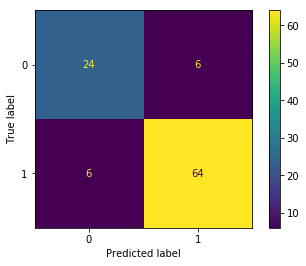

In [7]:
# Better visualization of a confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=m,display_labels=clf.classes_)
disp.plot()
plt.show()